In [1]:
import ble2lsl
from ble2lsl.devices import muse2016
from wizardhat import acquire, plot, transform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = muse2016
dummy_outlet = ble2lsl.Dummy(device)
receiver = acquire.Receiver()

Using source with ID Muse-DUMMY


Filter settings are sketchy.. gotta fix the passband setup

In [11]:
filter = transform.Filter(receiver.buffers['EEG'], 1, 5,'low')

Wait a little to give this 

In [12]:
# grab some data to compare
channel_to_view = 'TP9'
samples_to_view = 2000
raw = filter.buffer_in.data[channel_to_view][-samples_to_view:-1]
time_raw = filter.buffer_in.get_timestamps()[-samples_to_view:-1]
filt = filter.buffer_out.data[channel_to_view][-samples_to_view:-1]
time_filt = filter.buffer_out.get_timestamps()[-samples_to_view:-1]

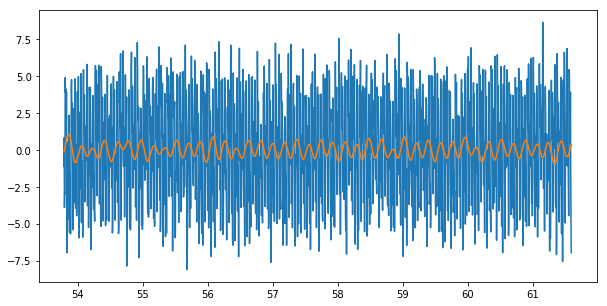

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time_raw,raw,label='raw')
ax.plot(time_filt,filt,label='filtered')